So we have here this files
- Accredited_Escrow_Agents.csv - 3kb - this is the list of accredited escrow agents
- Brokers.csv
- Buildings.csv
- Developers.csv - 426kb - this is the list of developers
- Land_Registry.csv
- Offices.csv
- Projects.csv
- Rent_Contracts.csv
- Units.csv

In [12]:
import polars as pl

# Read in the data
escrow = pl.read_csv('data/Accredited_Escrow_Agents.csv')

print("List of Escrow Agents:", '\n')
print(escrow)

List of Escrow Agents: 

shape: (25, 4)
┌─────────────────────┬───────────────────────────────┬──────────────────────────────┬─────────────┐
│ escrow_agent_number ┆ escrow_agent_name_ar          ┆ escrow_agent_name_en         ┆ phone       │
│ ---                 ┆ ---                           ┆ ---                          ┆ ---         │
│ i64                 ┆ str                           ┆ str                          ┆ str         │
╞═════════════════════╪═══════════════════════════════╪══════════════════════════════╪═════════════╡
│ 1                   ┆ بنك دبي الاسلامي (شركة مساهمة ┆ DUBAI ISLAMIC BANK (PUBLIC   ┆             │
│                     ┆ عا…                           ┆ JOINT…                       ┆             │
│ 2                   ┆ مصرف الامارات الاسلامي (شركه  ┆ EMIRATES ISLAMIC BANK        ┆             │
│                     ┆ مسا…                          ┆ P.J.S.C.                     ┆             │
│ 4                   ┆ مصرف ابوظبى الاسلامى       

## Developers

In [13]:
import pandas as pd
developers = pd.read_csv('data/Developers.csv')

print("List of Developers:", '\n')
print(developers)

List of Developers: 

      participant_id  developer_id  developer_number  \
0             414483             1                 1   
1             369041             2                 2   
2             374320             3                 3   
3             370974             4                 4   
4             371838             5                 5   
...              ...           ...               ...   
1288        90614952     534215574              1694   
1289        90825925     534293211              1695   
1290        90825785     534293212              1696   
1291        51951741     534293213              1697   
1292        85591767     534315436              1698   

                       developer_name_ar  \
0                مراس العقارية (ش.ذ.م.م)   
1                زعبيل للاستثمار (ذ.م.م)   
2            الفجر للعقارات (ش. ذ. م. م)   
3                   المنال للتطوير ش م ح   
4              كيه ام بروبرتيز (ش.ذ.م.م)   
...                                  ... 

Value Counts in 'legal_status_en':
 legal_status_en
Limited Responsibility    533
Off Shore                 130
New legal status           62
Personal                   60
مساهمة عامة                 4
Name: count, dtype: int64


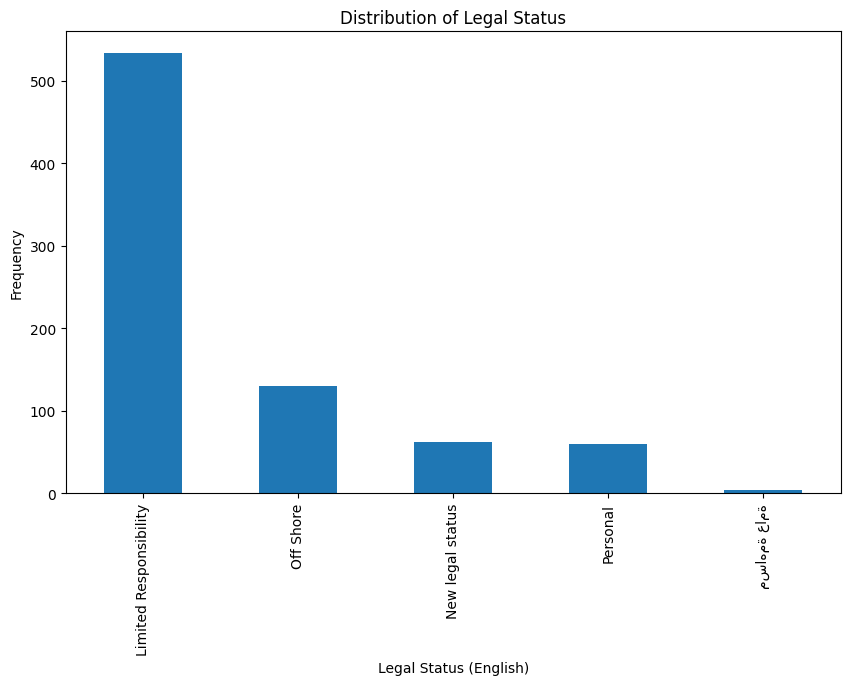

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded as 'developers'
# Uncomment below if you are reading the CSV file again
# developers = pd.read_csv('data/Developers.csv')

# Count the number of occurrences for each unique value in 'legal_status_en'
value_counts = developers['legal_status_en'].value_counts()
print("Value Counts in 'legal_status_en':\n", value_counts)  # Количество уникальных значений

# Visualize the above count using a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title("Distribution of Legal Status")
plt.xlabel("Legal Status (English)")
plt.ylabel("Frequency")
plt.show()


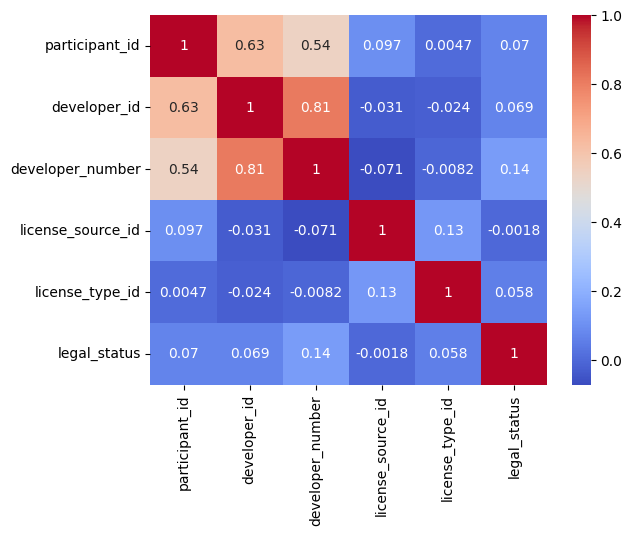

In [16]:
import numpy as np
import seaborn as sns
# Filter only numeric columns for correlation
numeric_cols = developers.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(developers[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
# Convert dates columns to datetime format
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'], dayfirst=True)
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'], dayfirst=True)
developers['registration_date'] = pd.to_datetime(developers['registration_date'], dayfirst=True)


In [18]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming the DataFrame is already loaded as 'developers'
# Uncomment below if you want to read the CSV file again
# developers = pd.read_csv('data/Developers.csv')

# Convert date columns to datetime format
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'])
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'])
developers['registration_date'] = pd.to_datetime(developers['registration_date'])

# Group by 'legal_status_en'
grouped = developers.groupby('legal_status_en')

# Create subplots
fig = make_subplots(rows=1, cols=len(grouped.groups), subplot_titles=list(grouped.groups.keys()))

# Loop through each group to add to subplot
for i, (name, group) in enumerate(grouped):
    for idx, row in group.iterrows():
        fig.add_trace(
            go.Scatter(x=[row['license_issue_date'], row['license_expiry_date']], y=[idx, idx],
                       mode='lines+markers+text',
                       hovertext=row['developer_name_en'],
                       line=dict(width=1)), 
            row=1, col=i+1
        )

# Update layout
fig.update_layout(
    title="Timeline of Active Licenses by Legal Status",
    xaxis_title="License Issue Date / Registration Date",
    yaxis_title="Developer Index"
)

fig.show()


In [19]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming the DataFrame is already loaded as 'developers'
# Uncomment below if you want to read the CSV file again
# developers = pd.read_csv('data/Developers.csv')

# Convert date columns to datetime format
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'])
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'])
developers['registration_date'] = pd.to_datetime(developers['registration_date'])

# Group by 'legal_status_en'
grouped = developers.groupby('legal_status_en')

# Create subplots with twice the height
fig = make_subplots(rows=1, cols=len(grouped.groups), subplot_titles=list(grouped.groups.keys()), 
                    vertical_spacing=0.3, row_heights=[2])

# Loop through each group to add to subplot
for i, (name, group) in enumerate(grouped):
    for idx, row in group.iterrows():
        fig.add_trace(
            go.Scatter(x=[row['license_issue_date'], row['license_expiry_date']], y=[idx, idx],
                       mode='lines+markers+text',
                       hovertext=row['developer_name_en'],  # Changed to 'developer_name_en'
                       line=dict(width=1)), 
            row=1, col=i+1
        )

# Update layout
fig.update_layout(
    title="Timeline of Active Licenses by Legal Status",
    xaxis_title="License Issue Date / Registration Date",
    yaxis_title="Developer Index",
    height=800  # Making the plot 2x taller
)

fig.show()


In [20]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

# Assuming the DataFrame is already loaded as 'developers'
# Uncomment below if you want to read the CSV file again
# developers = pd.read_csv('data/Developers.csv')

# Convert date columns to datetime format
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'])
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'])
developers['registration_date'] = pd.to_datetime(developers['registration_date'])

# Group by 'legal_status_en'
grouped = developers.groupby('legal_status_en')

# Create subplots with twice the height
fig = make_subplots(rows=1, cols=len(grouped.groups), subplot_titles=list(grouped.groups.keys()), 
                    vertical_spacing=0.3, row_heights=[2])

# Loop through each group to add to subplot
for i, (name, group) in enumerate(grouped):
    for idx, row in group.iterrows():
        fig.add_trace(
            go.Scatter(x=[row['license_issue_date'], row['license_expiry_date']], y=[idx, idx],
                       mode='lines+markers+text',
                       hovertext=row['developer_name_en'],
                       line=dict(width=1)),
            row=1, col=i+1
        )
        
    # Add a vertical line for the current date
    current_date = datetime.now()
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=current_date,
            x1=current_date,
            y0=0,
            y1=1,
            yref="paper",
            line=dict(
                color="Red",
                width=2,
            ),
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title="Timeline of Active Licenses by Legal Status",
    xaxis_title="License Issue Date / Registration Date",
    yaxis_title="Developer Index",
    height=800  # Making the plot 2x taller
)

fig.show()


In [21]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

# Assuming the DataFrame is already loaded as 'developers'
# Uncomment below if you want to read the CSV file again
# developers = pd.read_csv('data/Developers.csv')

# Convert date columns to datetime format
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'])
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'])
developers['registration_date'] = pd.to_datetime(developers['registration_date'])

# Group by 'legal_status_en'
grouped = developers.groupby('legal_status_en')

# Create subplots
fig = make_subplots(rows=1, cols=len(grouped.groups), subplot_titles=list(grouped.groups.keys()))

# Loop through each group to add to subplot
for i, (name, group) in enumerate(grouped):
    for idx, row in group.iterrows():
        fig.add_trace(
            go.Scatter(x=[row['license_issue_date'], row['license_expiry_date']], y=[idx, idx],
                       mode='lines+markers+text',
                       hovertext=row['developer_name_en'],
                       line=dict(width=1)),
            row=1, col=i+1
        )
        
    # Add a vertical line for the current date
    current_date = datetime.now()
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=current_date,
            x1=current_date,
            y0=0,
            y1=1,
            yref="paper",
            line=dict(
                color="Red",
                width=0.5,
            ),
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title="Timeline of Active Licenses by Legal Status",
    xaxis_title="License Issue Date / Registration Date",
    yaxis_title="Developer Index",
    height=700  # Setting the plot height to 700
)

fig.show()


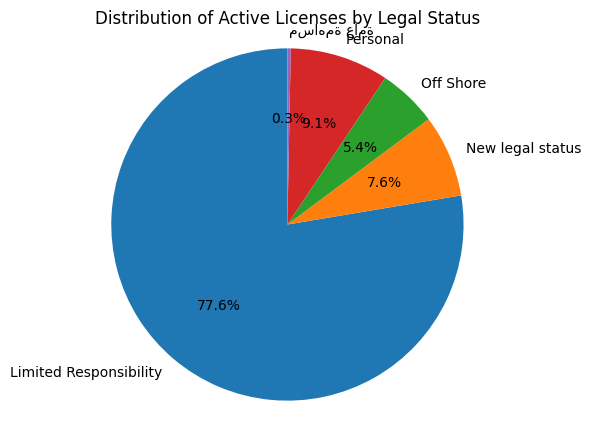

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming the DataFrame 'developers' is already loaded and date columns are in datetime format

# Filter rows where license is active (license_expiry_date >= today)
today = datetime.now()
active_licenses = developers[developers['license_expiry_date'] >= pd.Timestamp(today)]

# Group by 'legal_status_en' and count active licenses
grouped_active = active_licenses.groupby('legal_status_en').size()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(grouped_active, labels=grouped_active.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Active Licenses by Legal Status')
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Dummy DataFrame (just for demonstration purposes)
# Uncomment and adjust the line that loads the developers DataFrame in your real code
# developers = pd.read_csv('data/Developers.csv')

# Force-convert the datetime columns
developers['license_issue_date'] = pd.to_datetime(developers['license_issue_date'], errors='coerce')
developers['license_expiry_date'] = pd.to_datetime(developers['license_expiry_date'], errors='coerce')
developers['registration_date'] = pd.to_datetime(developers['registration_date'], errors='coerce')

# Remove rows where any of the date columns are NaT (Not a Time)
developers.dropna(subset=['license_issue_date', 'license_expiry_date', 'registration_date'], inplace=True)

# Now proceed to create the date range
date_range = pd.date_range(start=developers['license_issue_date'].min(), end=datetime.now(), freq='M')

# ... Rest of your code


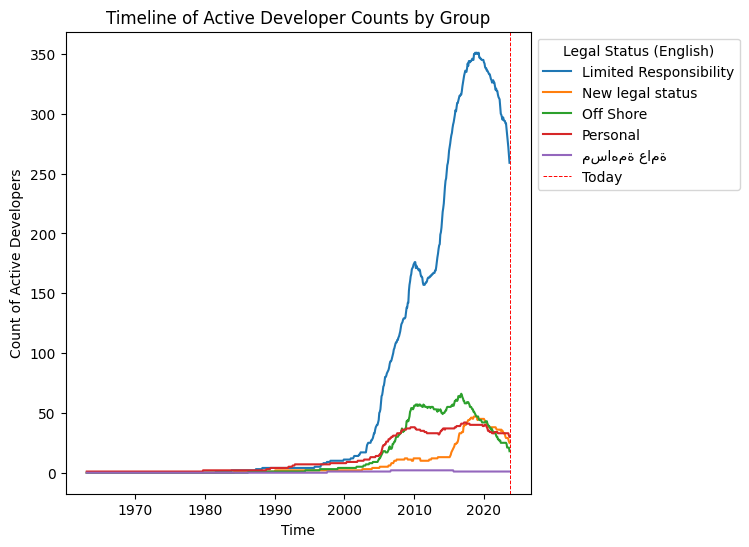

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming the DataFrame 'developers' is already loaded
# Also assuming date columns are converted to datetime format

# Create a date range from the earliest license issue date to today
date_range = pd.date_range(start=developers['license_issue_date'].min(), end=datetime.now(), freq='M')

# Initialize a DataFrame to store counts of active licenses
active_count_df = pd.DataFrame(index=date_range)

# Loop through each group and calculate active license counts over time
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts

# Plotting
plt.figure(figsize=(6, 6))

# Loop through each column and plot
for col in active_count_df.columns:
    plt.plot(active_count_df.index, active_count_df[col], label=col)

# Add vertical line to highlight today's date
plt.axvline(pd.Timestamp(datetime.now()), color='r', linestyle='--', linewidth=0.7, label='Today')

plt.title('Timeline of Active Developer Counts by Group')
plt.xlabel('Time')
plt.ylabel('Count of Active Developers')
plt.legend(title='Legal Status (English)', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Assuming the DataFrame 'developers' is loaded and the date columns are in datetime format

# Filter rows where license is active (license_expiry_date >= today)
today = datetime.now()
active_licenses = developers[developers['license_expiry_date'] >= pd.Timestamp(today)]

# Group by 'legal_status_en' and count active licenses
grouped_active = active_licenses.groupby('legal_status_en').size()

# Create color map based on unique groups
unique_groups = developers['legal_status_en'].unique()
colors = {group: color for group, color in zip(unique_groups, ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B'])}

# Create subplots
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]],
                    subplot_titles=("Timeline of Active Developer Counts by Group",))

# Create a date range that starts from 2000 and ends today, frequency set to 'M' for end of month
date_range = pd.date_range(start='2000-01-01', end=today, freq='M')
active_count_df = pd.DataFrame(index=date_range)

# Loop through each group and calculate active license counts over time
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts

# Calculate the sum for each time point
active_count_df['Total'] = active_count_df.sum(axis=1)

# Plot actual numbers, but legend shows developer count and market %
for col in active_count_df.columns:
    if col != 'Total':
        last_count = active_count_df[col].iloc[-1]
        last_total = active_count_df['Total'].iloc[-1]
        last_market_share = (last_count / last_total) * 100 if last_total > 0 else 0
        fig.add_trace(
            go.Scatter(
                x=active_count_df.index, 
                y=active_count_df[col], 
                name=f"{col} (Count: {last_count}, Market %: {last_market_share:.2f})", 
                line=dict(color=colors.get(col, '#333333'))
            ),
            row=1, col=1
        )

# Add vertical line to highlight today's date
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=today,
        x1=today,
        y0=0,
        y1=1,
        yref="paper",
        line=dict(color="Red", width=0.5, dash="dashdot")),
    row=1, col=1
)

# Update layout according to guidelines
fig.update_layout(
    height=500,
    width=1000,
    title="Developer Information Dashboard",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="#333333"
    ),
    xaxis=dict(
        showgrid=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="#dddddd"
    )
)

fig.show()


In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Sample DataFrame 'developers' for demonstration
# Assuming license_issue_date and license_expiry_date are already in datetime format
# Please replace this with your actual DataFrame

# Date range for plotting
date_range = pd.date_range(start='2000-01-01', end=datetime.now(), freq='M')

# DataFrame to hold active counts
active_count_df = pd.DataFrame(index=date_range)
active_count_df['Total'] = 0  # Initialize 'Total' column with zeros

# Loop through each group to populate active_count_df
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts
    active_count_df['Total'] += counts  # Update the 'Total' column

# Colors as per "Storytelling with Data"
colors = {'Status A': '#4C78A8', 'Status B': '#F58518', 'Total': '#000000'}

# Create subplot
fig = make_subplots(rows=1, cols=1, subplot_titles=("Timeline of Active Developer Counts by Group",))

# Add traces
for col in active_count_df.columns:
    last_count = active_count_df[col].iloc[-1]
    last_total = active_count_df['Total'].iloc[-1]
    last_market_share = (last_count / last_total) * 100 if last_total > 0 else 0

    legend_text = f"{col} (Count: {last_count}, Market %: {last_market_share:.2f})"
    fig.add_trace(
        go.Scatter(x=active_count_df.index, y=active_count_df[col], name=legend_text,
                   line=dict(color=colors.get(col, '#333333'))),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    height=500,
    width=1200,
    title="Developer Information Dashboard",
    legend=dict(x=0, y=1, traceorder="normal", bgcolor="rgba(255,255,255,0.7)"),
)

# Show plot
fig.show()


In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Assuming DataFrame 'developers' is loaded and the date columns are in datetime format
# You should have 5 groups in 'legal_status_en' and the column 'Total'

# Date range for plotting
date_range = pd.date_range(start='2000-01-01', end=datetime.now(), freq='Y')
active_count_df = pd.DataFrame(index=date_range)
active_count_df['Total'] = 0  # Initialize 'Total' column with zeros

# Loop through each group to populate active_count_df
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts
    active_count_df['Total'] += counts  # Update the 'Total' column

# Color settings based on "Storytelling with Data"
colors = {'Group1': '#4C78A8', 'Group2': '#F58518', 'Group3': '#E45756', 'Group4': '#72B7B2', 'Group5': '#54A24B', 'Total': 'red'}

# Create subplot
fig = make_subplots(rows=1, cols=1)

# Add traces
for col in active_count_df.columns:
    last_count = active_count_df[col].iloc[-1]
    last_total = active_count_df['Total'].iloc[-1]
    market_share = (last_count / last_total) * 100 if last_total > 0 else 0

    legend_text = f"{col} (Count: {last_count}, Market %: {market_share:.2f})"
    line_width = 4 if col == 'Total' else 1

    fig.add_trace(
        go.Scatter(x=active_count_df.index, y=active_count_df[col], name=legend_text,
                   line=dict(color=colors[col], width=line_width)),
    )

# Update layout
start_year = date_range.min().year
end_year = date_range.max().year
fig.update_layout(
    height=500,
    width=1200,
    title=f"Timeline of Active Developer Counts by Group ({start_year} - {end_year})",
    xaxis=dict(tickmode='linear', tick0=start_year, dtick=1),
    legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.7)')
)

fig.show()


KeyError: 'Limited Responsibility'

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Sample DataFrame 'developers' for demonstration
# Assuming license_issue_date and license_expiry_date are already in datetime format
# Replace this with your actual DataFrame

# Date range for plotting
date_range = pd.date_range(start='2000-01-01', end=datetime.now(), freq='M')

# DataFrame to hold active counts
active_count_df = pd.DataFrame(index=date_range)
active_count_df['Total'] = 0  # Initialize 'Total' column with zeros

# Loop through each group to populate active_count_df
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts
    active_count_df['Total'] += counts  # Update the 'Total' column

# Colors as per "Storytelling with Data"
colors = {'Status A': '#4C78A8', 'Status B': '#F58518', 'Total': 'red'}  # You can add more colors for your other groups

# Create subplot
fig = make_subplots(rows=1, cols=1, subplot_titles=("Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),))

# Add traces
for col in active_count_df.columns:
    last_count = active_count_df[col].iloc[-1]
    last_total = active_count_df['Total'].iloc[-1]
    market_share = (last_count / last_total) * 100 if last_total > 0 else 0

    legend_text = f"{col} (Count: {last_count}, Market %: {market_share:.2f})"
    line_width = 4 if col == 'Total' else 1  # Making 'Total' line bold

    fig.add_trace(
        go.Scatter(x=active_count_df.index, y=active_count_df[col], name=legend_text,
                   line=dict(color=colors.get(col, '#333333'), width=line_width)),  # Default color set to '#333333'
        row=1, col=1
    )

# Update layout
fig.update_layout(
    height=500,
    width=1200,
    title=dict(text="Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),
               font=dict(size=24)),
    legend=dict(x=0, y=1, traceorder="normal", bgcolor="rgba(255,255,255,0.7)")
)

# Show plot
fig.show()


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Sample DataFrame 'developers' for demonstration
# Assuming license_issue_date and license_expiry_date are already in datetime format
# Replace this with your actual DataFrame

# Date range for plotting
date_range = pd.date_range(start='2000-01-01', end=datetime.now(), freq='M')

# DataFrame to hold active counts
active_count_df = pd.DataFrame(index=date_range)
active_count_df['Total'] = 0  # Initialize 'Total' column with zeros

# Loop through each group to populate active_count_df
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts
    active_count_df['Total'] += counts  # Update the 'Total' column

# Colors as per "Storytelling with Data"
colors = {'Status A': '#4C78A8', 'Status B': '#F58518', 'Total': 'red'}  # You can add more colors for your other groups

# Create subplot
fig = make_subplots(rows=1, cols=1, subplot_titles=("Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),))

# Add traces
for col in active_count_df.columns:
    last_count = active_count_df[col].iloc[-1]
    last_total = active_count_df['Total'].iloc[-1]
    market_share = (last_count / last_total) * 100 if last_total > 0 else 0

    legend_text = f"{col} (Count: {last_count}, Market %: {market_share:.2f})"
    line_width = 4 if col == 'Total' else 1  # Making 'Total' line bold

    fig.add_trace(
        go.Scatter(x=active_count_df.index, y=active_count_df[col], name=legend_text,
                   line=dict(color=colors.get(col, '#333333'), width=line_width)),  # Default color set to '#333333'
        row=1, col=1
    )

# Update layout
fig.update_layout(
    height=500,
    width=1200,
    title=dict(text="Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),
               font=dict(size=24)),
    legend=dict(x=0, y=1, traceorder="normal", bgcolor="rgba(255,255,255,0.7)")
)

# Show plot
fig.show()


In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd

# Sample DataFrame 'developers' for demonstration
# Please replace this with your actual DataFrame

# Date range for plotting
date_range = pd.date_range(start='2000-01-01', end=datetime.now(), freq='M')

# DataFrame to hold active counts
active_count_df = pd.DataFrame(index=date_range)
active_count_df['Total'] = 0  # Initialize 'Total' column with zeros

# Loop through each group to populate active_count_df
for name, group in developers.groupby('legal_status_en'):
    counts = []
    for date in date_range:
        count = group[(group['license_issue_date'] <= date) & (group['license_expiry_date'] >= date)].shape[0]
        counts.append(count)
    active_count_df[name] = counts
    active_count_df['Total'] += counts  # Update the 'Total' column

# Colors as per "Storytelling with Data"
colors = {'Status A': '#4C78A8', 'Status B': '#F58518', 'Status C': '#E45756', 'Status D': '#72B7B2', 'Status E': '#54A24B', 'Total': 'red'}  # You can adjust these colors

# Create subplot
fig = make_subplots(rows=1, cols=1, subplot_titles=("Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),))

# Add traces
for col in active_count_df.columns:
    last_count = active_count_df[col].iloc[-1]
    last_total = active_count_df['Total'].iloc[-1]
    market_share = (last_count / last_total) * 100 if last_total > 0 else 0

    legend_text = f"{col} (Count: {last_count}, Market %: {market_share:.2f})"
    line_width = 2 if col == 'Total' else 1  # Making 'Total' line less bold

    fig.add_trace(
        go.Scatter(x=active_count_df.index, y=active_count_df[col], name=legend_text,
                   line=dict(color=colors.get(col, '#333333'), width=line_width)),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    height=500,
    width=1200,
    title=dict(text="Timeline of Active Developer Counts by Group: {} - {}".format(date_range.min().year, date_range.max().year),
               font=dict(size=24)),
    legend=dict(x=0, y=1, traceorder="normal", bgcolor="rgba(255,255,255,0.7)"),
    xaxis=dict(tickmode='array', tickvals=pd.date_range(start='2000-01-01', end=datetime.now(), freq='Y'))
)

# Show plot
fig.show()


Here we need to elaborate on the decline of developers in the region. Is it a sign of maturity of the real estate market or is it a sign of a crisis? How this will affect the market? What are the consequences of this decline?